In [1]:
cd <your path>

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
# import re
import glob
import json

# Read Data

In [4]:
files_lines = dict()
columns = ['Rank', 'Reg', 'Alpha', 'Maxiter', 'Metric', 'Time_TTL', 'Time_fit', 'Time_rec', 'Time_evl']
for filename in list(np.sort([glob.glob('./*.txt')])[0]):
    file_lines = []
    with open(filename) as file:
        for line in file:
            if line.startswith('With'):
                newline = [float(keyvalue.split(':')[1]) for keyvalue in line.replace(' ','').split(',')]
                file_lines.append(newline)
    file_lines = pd.DataFrame(file_lines, columns = columns)
    file_lines.sort_values(by = ['Rank'], inplace=True)
    key = filename.split('.')[1][1:].replace('stats_0_','spark 0.').replace('stats_1_','spark 1.')\
    .replace('stats_lenskit_0_','lenskit 0.').replace('stats_lenskit_1_','lenskit 1.')
    print('filename:', filename, ';  key:', key)
    files_lines[key] = file_lines

filename: ./stats_0_01.txt ;  key: spark 0.01
filename: ./stats_0_05.txt ;  key: spark 0.05
filename: ./stats_0_25.txt ;  key: spark 0.25
filename: ./stats_1_0.txt ;  key: spark 1.0
filename: ./stats_lenskit_0_01.txt ;  key: lenskit 0.01
filename: ./stats_lenskit_0_05.txt ;  key: lenskit 0.05
filename: ./stats_lenskit_0_25.txt ;  key: lenskit 0.25
filename: ./stats_lenskit_1_0.txt ;  key: lenskit 1.0


In [5]:
cd /content/drive/MyDrive/Colab Notebooks/1004_Project/saved_tuned_bias_model_stats

/content/drive/MyDrive/Colab Notebooks/1004_Project/saved_tuned_bias_model_stats


In [6]:
bias_files_lines = dict()
columns = ['items', 'users', 'damping', 'Metric', 'Time_TTL', 'Time_fit', 'Time_rec', 'Time_evl']
for filename in list(np.sort([glob.glob('./*.txt')])[0]):
    file_lines = []
    with open(filename) as file:
        for line in file:
            if line.startswith('items'):
                newline = [float(keyvalue.split(':')[1]) if keyvalue.split(':')[1] not in ('True','False') else json.loads(keyvalue.split(':')[1].lower()) for keyvalue in line.replace(' ','').split(',')]
                file_lines.append(newline)
    file_lines = pd.DataFrame(file_lines, columns = columns)
    file_lines.sort_values(by = ['items','damping'], inplace=True)
    key = filename.split('.')[1][1:].replace('stats_lenskit_0_','lenskit 0.').replace('stats_lenskit_1_','lenskit 1.')
    print('filename:', filename, ';  key:', key)
    bias_files_lines[key] = file_lines

filename: ./stats_lenskit_0_01.txt ;  key: lenskit 0.01
filename: ./stats_lenskit_0_05.txt ;  key: lenskit 0.05
filename: ./stats_lenskit_0_25.txt ;  key: lenskit 0.25
filename: ./stats_lenskit_1_0.txt ;  key: lenskit 1.0


# Visualization: ALS

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# COLORS_ALL = ['tab:blue','tab:green','tab:orange','tab:red']
COLORS_ALL = ['lightsteelblue','royalblue','navy','black']

## PySpark

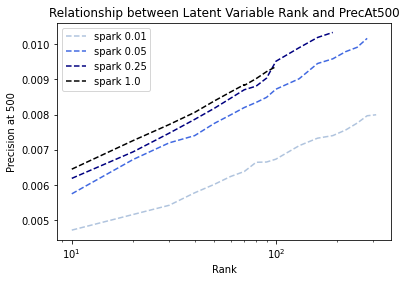

In [8]:
colors = COLORS_ALL[:int(len(files_lines)/2)]

fig, ax = plt.subplots(figsize = (6,4))
for key, df in files_lines.items():
    df_selected = df[(df['Reg'] == 1.0) & (df['Alpha'] == 1.0) & (df['Maxiter'] == 5.0)]
    color = colors.pop(0)
    if key.startswith('spark'):
        # pass
        ax.plot(df_selected['Rank'], df_selected['Metric'], '--', label = key, color = color, alpha = 1)
    else:
        pass
        # ax.plot(df_selected['Rank'], df_selected['Metric'], '.-',label = key, color = color, alpha = 1)
    colors.append(color)

ax.set_xscale('log')
ax.set_xlabel('Rank')
ax.set_ylabel('Precision at 500')
ax.set_title('Relationship between Latent Variable Rank and PrecAt500')
plt.legend()
plt.show()

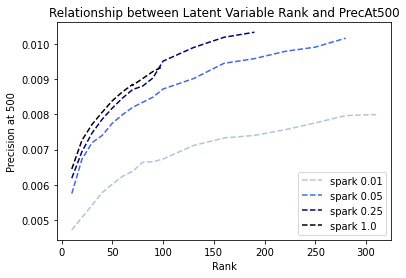

In [15]:
colors = COLORS_ALL[:int(len(files_lines)/2)]

fig, ax = plt.subplots(figsize = (6,4))
for key, df in files_lines.items():
    df_selected = df[(df['Reg'] == 1.0) & (df['Alpha'] == 1.0) & (df['Maxiter'] == 5.0)]
    color = colors.pop(0)
    if key.startswith('spark'):
        # pass
        ax.plot(df_selected['Rank'], df_selected['Metric'], '--', label = key, color = color, alpha = 1)
    else:
        pass
        # ax.plot(df_selected['Rank'], df_selected['Metric'], '.-',label = key, color = color, alpha = 1)
    colors.append(color)

# ax.set_xscale('log')
ax.set_xlabel('Rank')
ax.set_ylabel('Precision at 500')
ax.set_title('Relationship between Latent Variable Rank and PrecAt500')
plt.legend()
plt.show()

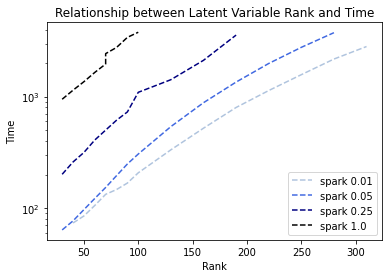

In [13]:
colors = COLORS_ALL[:int(len(files_lines)/2)]

fig, ax = plt.subplots(figsize = (6,4))
for key, df in files_lines.items():
    df_selected = df[(df['Reg'] == 1.0) & (df['Alpha'] == 1.0) & (df['Maxiter'] == 5.0)][2:]
    color = colors.pop(0)
    if key.startswith('spark'):
        # pass
        ax.plot(df_selected['Rank'], df_selected['Time_TTL'], '--', label = key, color = color, alpha = 1)
    else:
        pass
        # ax.plot(df_selected['Rank'], df_selected['Time_TTL'], '.-',label = key, color = color, alpha = 1)
    colors.append(color)

ax.set_yscale('log')
ax.set_xlabel('Rank')
ax.set_ylabel('Time')
ax.set_title('Relationship between Latent Variable Rank and Time')
plt.legend()
plt.show()

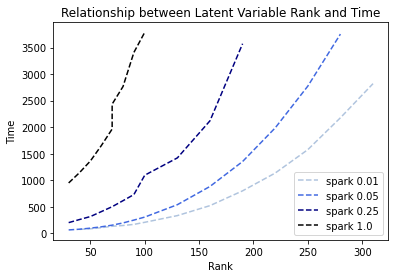

In [14]:
colors = COLORS_ALL[:int(len(files_lines)/2)]

fig, ax = plt.subplots(figsize = (6,4))
for key, df in files_lines.items():
    df_selected = df[(df['Reg'] == 1.0) & (df['Alpha'] == 1.0) & (df['Maxiter'] == 5.0)][2:]
    color = colors.pop(0)
    if key.startswith('spark'):
        # pass
        ax.plot(df_selected['Rank'], df_selected['Time_TTL'], '--', label = key, color = color, alpha = 1)
    else:
        pass
        # ax.plot(df_selected['Rank'], df_selected['Time_TTL'], '.-',label = key, color = color, alpha = 1)
    colors.append(color)

# ax.set_yscale('log')
ax.set_xlabel('Rank')
ax.set_ylabel('Time')
ax.set_title('Relationship between Latent Variable Rank and Time')
plt.legend()
plt.show()

## Compare with lenskit

### Time

Lenskit is faster. WHY?

Lenskit method (string) – the training method.
* 'cg' (the default, also we used)
    Conjugate gradient method [TPT2011].

* 'lu'
    A direct implementation of the original implicit-feedback ALS concept [HKV2008] using LU-decomposition to solve for the optimized matrices.

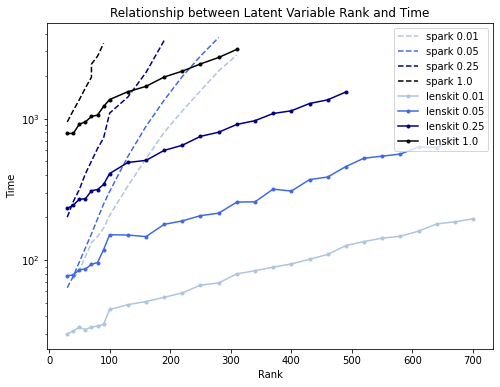

In [ ]:
colors = COLORS_ALL[:int(len(files_lines)/2)]

fig, ax = plt.subplots(figsize = (8,6))
for key, df in files_lines.items():
    df_selected = df[(df['Reg'] == 1.0) & (df['Alpha'] == 1.0) & (df['Maxiter'] == 5.0)][2:]
    color = colors.pop(0)
    if key.startswith('spark'):
        # pass
        ax.plot(df_selected['Rank'], df_selected['Time_TTL'], '--', label = key, color = color, alpha = 1)
    else:
        ax.plot(df_selected['Rank'], df_selected['Time_TTL'], '.-',label = key, color = color, alpha = 1)
    colors.append(color)

ax.set_yscale('log')
ax.set_xlabel('Rank')
ax.set_ylabel('Time')
ax.set_title('Relationship between Latent Variable Rank and Time')
plt.legend()
plt.show()

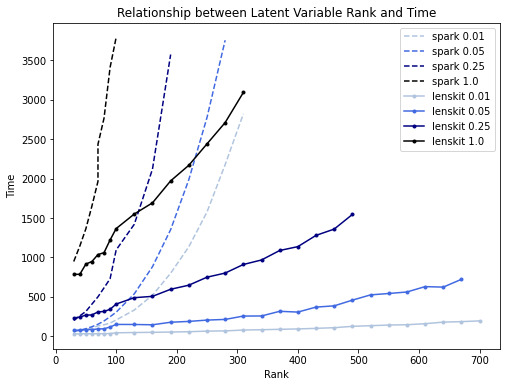

In [16]:
colors = COLORS_ALL[:int(len(files_lines)/2)]

fig, ax = plt.subplots(figsize = (8,6))
for key, df in files_lines.items():
    df_selected = df[(df['Reg'] == 1.0) & (df['Alpha'] == 1.0) & (df['Maxiter'] == 5.0)][2:]
    color = colors.pop(0)
    if key.startswith('spark'):
        # pass
        ax.plot(df_selected['Rank'], df_selected['Time_TTL'], '--', label = key, color = color, alpha = 1)
    else:
        ax.plot(df_selected['Rank'], df_selected['Time_TTL'], '.-',label = key, color = color, alpha = 1)
    colors.append(color)

# ax.set_yscale('log')
ax.set_xlabel('Rank')
ax.set_ylabel('Time')
ax.set_title('Relationship between Latent Variable Rank and Time')
plt.legend()
plt.show()

### Precision 
Note:  [Precision(lenskit)](https://lkpy.readthedocs.io/en/stable/evaluation/topn-metrics.html?highlight=topn#module-lenskit.topn) vs [PrecisionAt(pyspark)](https://spark.apache.org/docs/2.4.7/mllib-evaluation-metrics.html#ranking-systems)

Precision of lenskit is unstable but higher when dataset is small. WHY?

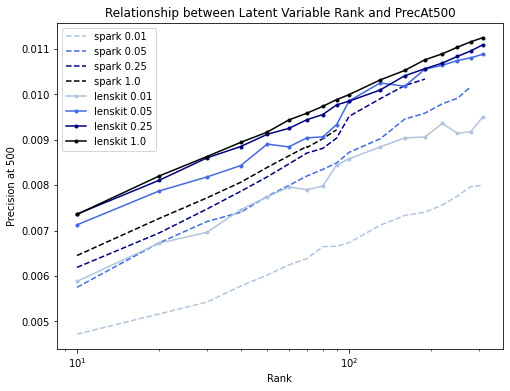

In [ ]:
colors = COLORS_ALL[:int(len(files_lines)/2)]

fig, ax = plt.subplots(figsize = (8,6))
for key, df in files_lines.items():
    df_selected = df[(df['Reg'] == 1.0) & (df['Alpha'] == 1.0) & (df['Maxiter'] == 5.0) & (df['Rank'] <= 310)]
    color = colors.pop(0)
    if key.startswith('spark'):
        # pass
        ax.plot(df_selected['Rank'], df_selected['Metric'], '--', label = key, color = color, alpha = 1)
    else:
        pass
        ax.plot(df_selected['Rank'], df_selected['Metric'], '.-',label = key, color = color, alpha = 1)
    colors.append(color)

ax.set_xscale('log')
ax.set_xlabel('Rank')
ax.set_ylabel('Precision at 500')
ax.set_title('Relationship between Latent Variable Rank and PrecAt500')
plt.legend()
plt.show()

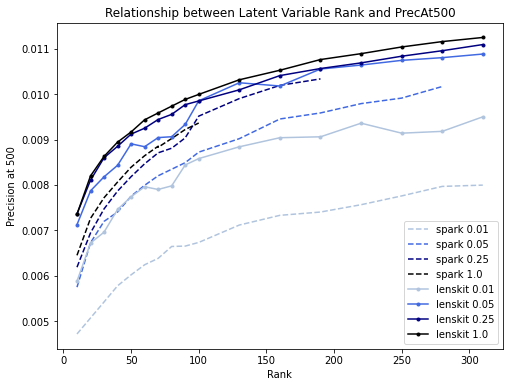

In [17]:
colors = COLORS_ALL[:int(len(files_lines)/2)]

fig, ax = plt.subplots(figsize = (8,6))
for key, df in files_lines.items():
    df_selected = df[(df['Reg'] == 1.0) & (df['Alpha'] == 1.0) & (df['Maxiter'] == 5.0) & (df['Rank'] <= 310)]
    color = colors.pop(0)
    if key.startswith('spark'):
        # pass
        ax.plot(df_selected['Rank'], df_selected['Metric'], '--', label = key, color = color, alpha = 1)
    else:
        pass
        ax.plot(df_selected['Rank'], df_selected['Metric'], '.-',label = key, color = color, alpha = 1)
    colors.append(color)

# ax.set_xscale('log')
ax.set_xlabel('Rank')
ax.set_ylabel('Precision at 500')
ax.set_title('Relationship between Latent Variable Rank and PrecAt500')
plt.legend()
plt.show()

# Visualization: Bias

lenskit 0.01 0    0.000045
Name: Metric, dtype: float64
lenskit 0.05 8    0.000044
Name: Metric, dtype: float64
lenskit 0.25 7    0.000044
Name: Metric, dtype: float64
lenskit 1.0 8    0.000043
Name: Metric, dtype: float64


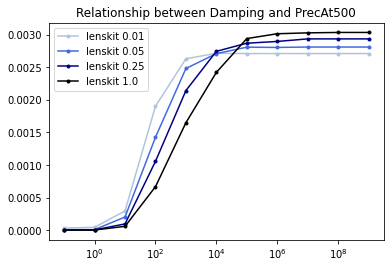

In [ ]:
colors = COLORS_ALL[:4]

fig, ax = plt.subplots(figsize = (6,4))
for key, df in bias_files_lines.items():
    # df_selected = df[(df['items'] == True) & (df['users'] == True)]
    # plt.plot(df_selected['damping'], df_selected['Metric'], label = 'items: T, users: T')

    color = colors.pop(0)
    df_selected = df[(df['items'] == True) & (df['users'] == False)]
    ax.plot(df_selected['damping'], df_selected['Metric'], '.-', label = key, color = color)
    colors.append(color)

    # df_selected = df[(df['items'] == False) & (df['users'] == True)]
    # plt.plot(df_selected['damping'], df_selected['Metric'], label = 'items: F, users: T')

    df_selected = df[(df['items'] == False) & (df['users'] == False)]
    print(key, df_selected['Metric'])
    
ax.set_xscale('log')
ax.set_title('Relationship between Damping and PrecAt500')
plt.legend()
plt.show()